**Exercise-1.**

Brodnjak-Vonina et al. (2005) develop a methodology for food laboratories to determine the type of oil from a sample. In their procedure, they used a gas chromatograph (an instrument that separates chemicals in a sample) to measure seven different fatty acids in an oil. These measurements would then be used to predict the type of oil in a food sample. To create their model, they used 96 samples of seven types of oils.

These data can be found in the caret package using data(oil). The oil types are contained in a factor variable called oilType. The types are pumpkin (coded as A), sunflower (B), peanut (C), olive (D), soybean (E), rapeseed (F) and corn (G).

a.	Use the sample function in base R to create a completely random sample of 60 oils. How closely do the frequencies of the random sample match the original samples? Repeat this procedure several times to understand the variation in the sampling process.

b.	Use the caret package function createDataPartition to create a stratified random sample. How does this compare to the completely random samples?

c.	With such a small sample size, what are the options for determining performance of the model? Should a test set be used?

d.	One method for understanding the uncertainty of a test set is to use a confidence interval. To obtain a confidence interval for the overall accu- racy, the based R function binom.test can be used. It requires the user to input the number of samples and the number correctly classified to calculate the interval. For example, suppose a test set sample of 20 oil samples was set aside and 76 were used for model training. For this test set size and a model that is about 80 % accurate (16 out of 20 correct), the confidence interval would be computed using
binom.test(16, 20)
             Exact binomial test
data: 16 and 20
number of successes = 16, number of trials = 20, p-value = 0.01182       alternative hypothesis: true probability of success is not equal to 0.5                   95 percent confidence interval:
0.563386 0.942666 
sample estimates: 
probability of success
0.8
In this case, the width of the 95% confidence interval is 37.9%. Try different samples sizes and accuracy rates to understand the trade-off between the uncertainty in the results, the model performance, and the test set size.
```{r}

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
library(caret)
data(oil)
str(oilType)
table(oilType)

 Factor w/ 7 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


oilType
 A  B  C  D  E  F  G 
37 26  3  7 11 10  2 

In [ ]:
##We can create 20 splits using the sample function:
sampNum <- floor(length(oilType)*.6) + 1
set.seed(629)
oilSplits <- vector(mode = "list", length = 20)
for(i in seq(along = oilSplits)) oilSplits[[i]] <- table(sample(oilType, size = sampNum))
head(oilSplits, 3)

[[1]]

 A  B  C  D  E  F  G 
20 16  2  4  8  8  0 

[[2]]

 A  B  C  D  E  F  G 
22 17  2  5  4  6  2 

[[3]]

 A  B  C  D  E  F  G 
27 15  1  4  5  4  2 


In [ ]:
## Combine the list of tables into a matrix
oilSplits <- do.call("rbind", oilSplits)
head(oilSplits, 3)

A,B,C,D,E,F,G
20,16,2,4,8,8,0
22,17,2,5,4,6,2
27,15,1,4,5,4,2


In [ ]:
## What does the distirbution of class percentages look like?
summary(oilSplits/sampNum)

       A                B                C                 D          
 Min.   :0.3276   Min.   :0.1897   Min.   :0.00000   Min.   :0.01724  
 1st Qu.:0.3621   1st Qu.:0.2543   1st Qu.:0.01724   1st Qu.:0.06466  
 Median :0.3966   Median :0.2759   Median :0.03448   Median :0.06897  
 Mean   :0.3931   Mean   :0.2707   Mean   :0.02931   Mean   :0.07328  
 3rd Qu.:0.4138   3rd Qu.:0.2931   3rd Qu.:0.03448   3rd Qu.:0.08621  
 Max.   :0.4655   Max.   :0.3448   Max.   :0.05172   Max.   :0.12069  
       E                 F                 G          
 Min.   :0.05172   Min.   :0.06897   Min.   :0.00000  
 1st Qu.:0.08621   1st Qu.:0.08621   1st Qu.:0.01724  
 Median :0.10345   Median :0.09483   Median :0.01724  
 Mean   :0.10603   Mean   :0.10345   Mean   :0.02414  
 3rd Qu.:0.12069   3rd Qu.:0.12069   3rd Qu.:0.03448  
 Max.   :0.15517   Max.   :0.17241   Max.   :0.03448  

In [ ]:
##Using a stratified random sample using createDataPartition:
set.seed(629)
oilSplits2 <- createDataPartition(oilType, p = .60, times = 20)
oilSplits2 <- lapply(oilSplits2, function(x, y) table(y[x]), y = oilType)
head(oilSplits2, 3)

$Resample01

 A  B  C  D  E  F  G 
23 16  2  5  7  6  2 

$Resample02

 A  B  C  D  E  F  G 
23 16  2  5  7  6  2 

$Resample03

 A  B  C  D  E  F  G 
23 16  2  5  7  6  2 


In [ ]:
oilSplits2 <- do.call("rbind", oilSplits2)
summary(oilSplits2/sampNum)

       A                B                C                 D          
 Min.   :0.3966   Min.   :0.2759   Min.   :0.03448   Min.   :0.08621  
 1st Qu.:0.3966   1st Qu.:0.2759   1st Qu.:0.03448   1st Qu.:0.08621  
 Median :0.3966   Median :0.2759   Median :0.03448   Median :0.08621  
 Mean   :0.3966   Mean   :0.2759   Mean   :0.03448   Mean   :0.08621  
 3rd Qu.:0.3966   3rd Qu.:0.2759   3rd Qu.:0.03448   3rd Qu.:0.08621  
 Max.   :0.3966   Max.   :0.2759   Max.   :0.03448   Max.   :0.08621  
       E                F                G          
 Min.   :0.1207   Min.   :0.1034   Min.   :0.03448  
 1st Qu.:0.1207   1st Qu.:0.1034   1st Qu.:0.03448  
 Median :0.1207   Median :0.1034   Median :0.03448  
 Mean   :0.1207   Mean   :0.1034   Mean   :0.03448  
 3rd Qu.:0.1207   3rd Qu.:0.1034   3rd Qu.:0.03448  
 Max.   :0.1207   Max.   :0.1034   Max.   :0.03448  

The sampling done using createDataPartition has much less variability that using the sample
function, and each partition has at least one sample in each class.
Choosing a data splitting strategy is dificult. One possibility would be leave{one{out cross{
validation only because, with the exception of class G, each class will be represented in each re-
sample. It should be noted that some classification models require at least one sample from each
class, so resampling these data may place a restriction one which models can be used. As for a test
set, it may be reasonable to rely on leave{one{out cross{validation as the only method for assessing
performance. Alternatively, a test set could be used if it only consisted of the classes with the most
samples (e.g. A, B and maybe E and F) although this would only protect against gross overfitting.
Looking at the confidence intervals for overall accuracy, let's examine samples sizes between 10 and
30 and accuracy rates of 70% to 95%:

In [ ]:
#Looking at the condence intervals for overall accuracy, lets examine samples sizes between 10 and 30 and accuracy rates of 70% to 95%:

getWidth <- function(values) {
  binom.test(x = floor(values["size"]*values["accuracy"])+1, 
             n = values["size"])$conf.int
}

ciInfo <- expand.grid(size = 10:30, accuracy = seq(.7, .95, by = 0.01))
ciWidths <- t(apply(ciInfo, 1, getWidth))
head(ciWidths)

0.4439045,0.9747893
0.3902574,0.9397823
0.4281415,0.9451394
0.4618685,0.9496189
0.4189647,0.9161107
0.4489968,0.9221285


In [ ]:
ciInfo$length <- ciWidths[,2] - ciWidths[,1]

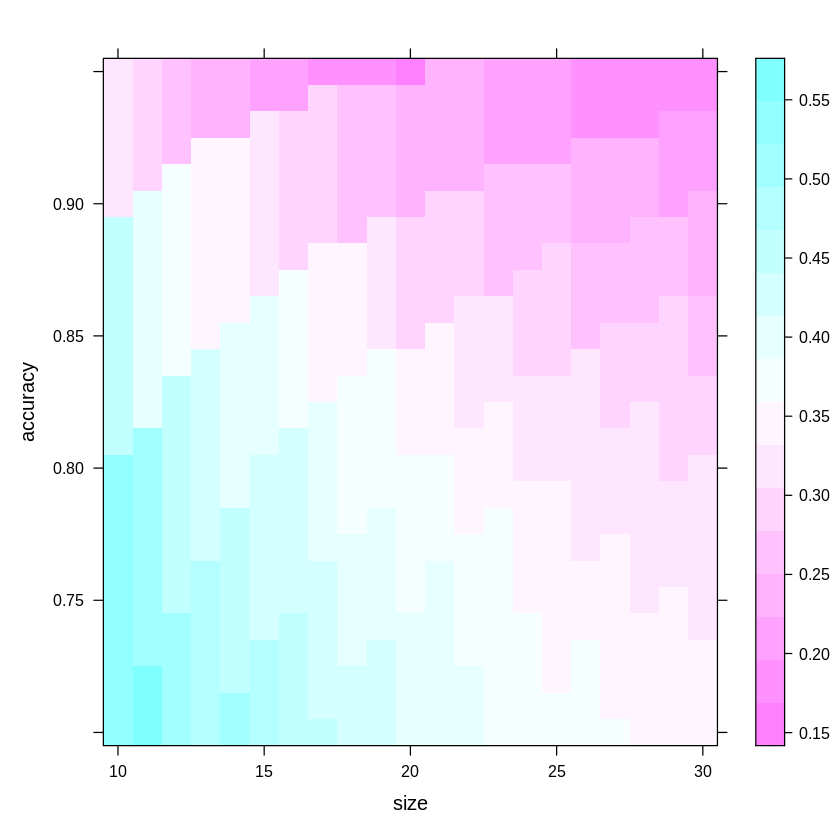

In [ ]:
levelplot(length ~ size * accuracy, data = ciInfo)

In [ ]:
##Figure : The width of a binomial confidence interval for overall accuracy for dierent sample sizes and accuracy rates.

**Exercise 2**

Partial least squares (Sect. 6.3) was used to model the yield of a chemical manufacturing process
(Sect. 1.4). The data can be found in the AppliedPredictiveModeling package and can be loaded
using:
library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)

The objective of this analysis is to nd the number of PLS components that yields the optimal R2 value (Sect. 5.1). PLS models with 1 through 10 components were each evaluated using 5 repeats of 10-fold cross{validation and the results are presented in the following table.

(a) Using the \one{standard error" method, what number of PLS components provides the
most parsimonious model?

(b) Compute the tolerance values for this example. If a 10% loss in R2 is acceptable, then
what is the optimal number of PLS components?

(c) Several other models (discussed in Part II) with varying degrees of complexity were trained
and tuned and the results are presented in Figure 6. If the goal is to select the model that optimizes R2, then which model(s) would you choose, and why?

(d) Prediction time, as well as model complexity (Sect. 4.8) are other factors to consider when
selecting the optimal model(s). Given each model's prediction time, model complexity, and
R2 estimates, which model(s) would you choose, and why?

In [ ]:
install.packages("AppliedPredictiveModeling")

library(AppliedPredictiveModeling)
data(ChemicalManufacturingProcess)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘rpart.plot’, ‘CORElearn’, ‘ellipse’




In [ ]:
set.seed(19711230)

In [ ]:
install.packages("pls")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
plsProfileChemMod <- train(Yield ~.,
                           data = ChemicalManufacturingProcess,
                           method = "pls",
                           preProc = c("center", "scale"),
                           tuneLength = 10,
                           na.action = na.omit,
                           trControl = trainControl(method = "repeatedcv", repeats = 5))

In [ ]:
R2values <- plsProfileChemMod$results[, c("ncomp", "Rsquared", "RsquaredSD")]

In [ ]:
R2values

,ncomp,Rsquared,RsquaredSD
,<dbl>,<dbl>,<dbl>
1,1,0.4726421,0.1660651
2,2,0.5253114,0.2006367
3,3,0.5621905,0.1807620
4,4,0.5647105,0.2018239
5,5,0.5581451,0.2174532
6,6,0.5548752,0.2211794
7,7,0.5497984,0.2206225
8,8,0.5509036,0.2220023
9,9,0.5376723,0.2163611


In [ ]:
R2values$RsquaredSEM <- R2values$RsquaredSD/sqrt(length(plsProfileChemMod$control$index))

In [ ]:
R2values

,ncomp,Rsquared,RsquaredSD,RsquaredSEM
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4726421,0.1660651,0.02348515
2,2,0.5253114,0.2006367,0.02837432
3,3,0.5621905,0.1807620,0.02556361
4,4,0.5647105,0.2018239,0.02854221
5,5,0.5581451,0.2174532,0.03075253
6,6,0.5548752,0.2211794,0.03127949
7,7,0.5497984,0.2206225,0.03120074
8,8,0.5509036,0.2220023,0.03139586
9,9,0.5376723,0.2163611,0.03059808


In [ ]:
"""R2values Table show the results but lets plot them too. The easiest way to do this is using the package
ggplot2. First, we can make a plot of the R2 values, showing the resampled estimate minus one
standard error."""

In [ ]:
library(ggplot2)
oneSE <- ggplot(R2values,
 ## Create an aesthetic mapping that plots the
 ## number of PLS components versus the R^2
 ## values and their one SE lower bound
 aes(ncomp, Rsquared,
 ymin = Rsquared - RsquaredSEM,
 ## don't add anything here to get
 ## a one-sided interval plot
 ymax=Rsquared))

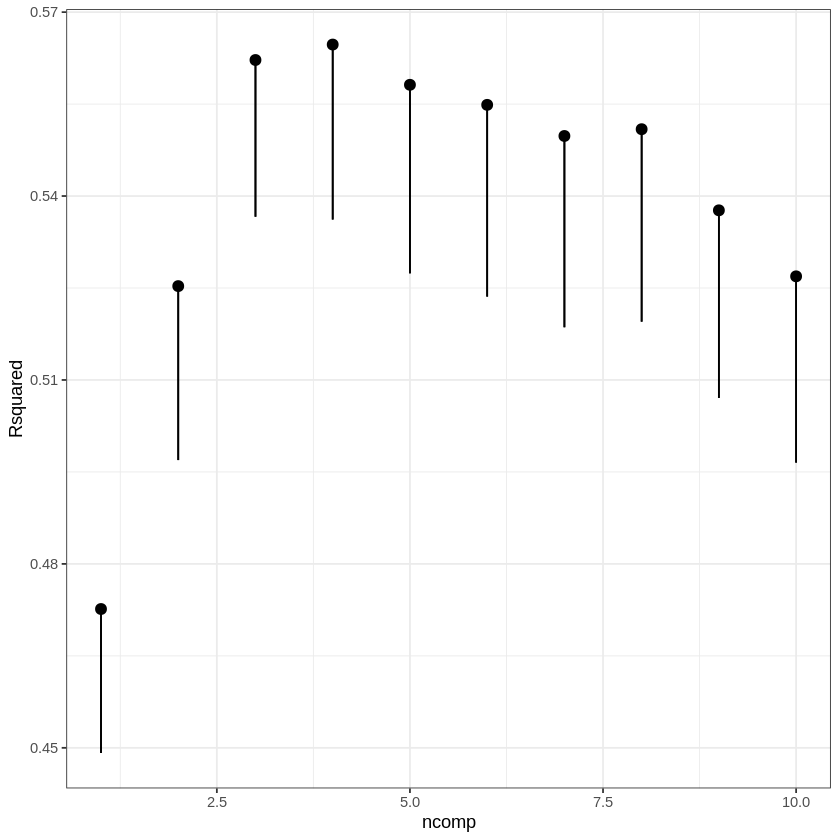

In [ ]:
## geom_linerange shoes the interval and geom_pointrange
## plots the resampled estimates.
oneSE + geom_linerange() + geom_pointrange() + theme_bw()

Figure 1: Resampled R2 values with a lower bound of one standard error for the chemical manu-
facturing data.

5a)Above Figure shows the results. The best setting uses 4 PLS components with a lower bound of 0.51.
There is 1 parameter setting whose resampled R2 estimate is greater than or equal to this bound
(and are simpler): a model using 3 PLS components.

In [ ]:
bestR2 <- subset(R2values, ncomp == which.max(R2values$Rsquared))

In [ ]:
bestR2

,ncomp,Rsquared,RsquaredSD,RsquaredSEM
,<dbl>,<dbl>,<dbl>,<dbl>
4,4,0.5647105,0.2018239,0.02854221


In [ ]:
bestR2$lb <- bestR2$Rsquared - bestR2$RsquaredSEM

In [ ]:
bestR2

,ncomp,Rsquared,RsquaredSD,RsquaredSEM,lb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,0.5647105,0.2018239,0.02854221,0.5361683


In [ ]:
candR2 <- subset(R2values, Rsquared >= bestR2$lb & ncomp < bestR2$ncomp)

5b)The following syntax can be used to get the tolerance values:

In [ ]:
bestR2 <- subset(R2values, ncomp == which.max(R2values$Rsquared))

In [ ]:
bestR2

,ncomp,Rsquared,RsquaredSD,RsquaredSEM
,<dbl>,<dbl>,<dbl>,<dbl>
4,4,0.5647105,0.2018239,0.02854221


In [ ]:
R2values$tolerance <- (R2values$Rsquared - bestR2$Rsquared)/bestR2$Rsquared * 100

In [ ]:
R2values$tolerance

[1] -16.3036434  -6.9768746  -0.4462592   0.0000000  -1.1626131  -1.7416658
 [7]  -2.6406606  -2.4449613  -4.7879868  -6.6947543

Let's stick with ggplot2 graphics and plot these in Figure 5 using qplot(ncomp, tolerance, data
= R2values). The lowest setting that does not exceed a 10% tolerance is a 2 component model.

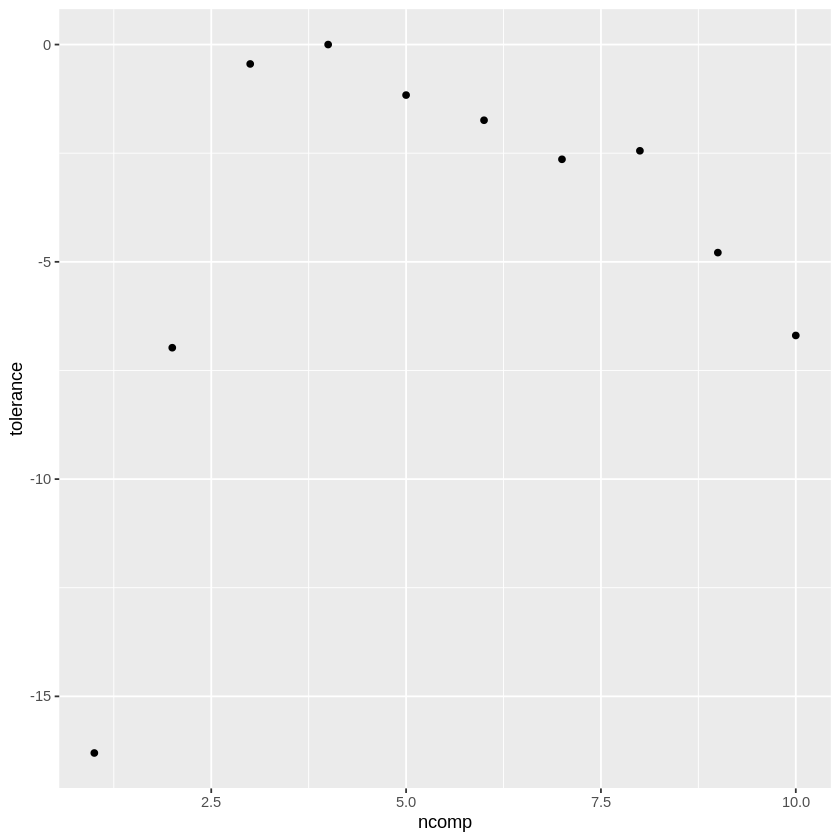

In [ ]:
qplot(ncomp, tolerance, data= R2values)

Figure 2: R2 tolerance values for the chemical manufacturing data.

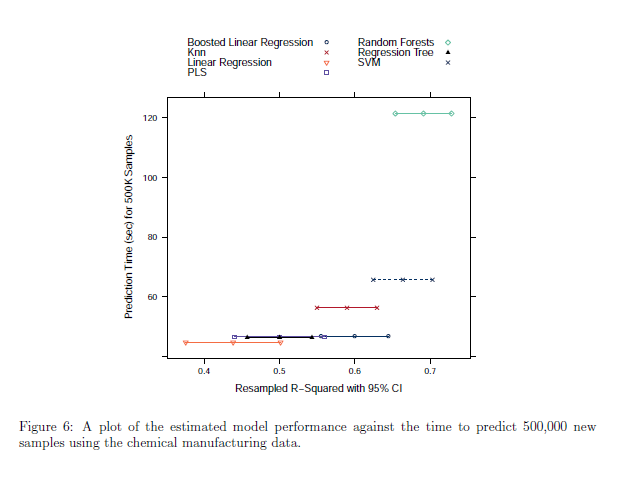

5C. Looking at Figure 6, the model with the best R2 value is random forest. However, the support
vector machine has nearly equivalent results and the confidence intervals for the R2 values have
some overlap. The next best model is boosted linear regression, although this model is probably
significantly worse that the support vector machine. Based on R2 alone, the random forest or SVM
models would be best. 

5D. However, when execution time is factored in, the SVM model clearly wins
since it is far faster. This is, of course, subjective since it is highly dependent on the implementation.
If the prediction function needed to be recoded for use, neither of these models would be preferred.
In that case, the regression tree or PLS model would be better choices, albeit with a substantial
drop in R2.